##### 【 ML - 꽃 품종 식별 모델 구현 】

- 주____제 : 3개 꽃 품종 식별 모델 구현으로 꽃가게 웹 서비스 
- 데이터셋
    * 파일명: Data/iris.csv
    * 피쳐들: **직접입력**
    * 타__겟: **직접입력**
- 학습_종류: **직접입력**
- 학습_방법: **직접입력**

- 조____건  
    (1) 4개의 피쳐를 모두 사용한 모델  
    (2) 4개중 중요 피쳐만 사용한 모델

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 학습 알고리즘
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## Cow 기능 활성화 : 데이터 변경시 복사 후 처리
## copy오류는 뜨는데 계속 copy하면 메모리 낭비니깐 이런 방법으로 해결함
if not pd.get_option('copy_on_write'):
    pd.options.mode.copy_on_write = True
    print(f"CoW : {pd.get_option('copy_on_write')}")

CoW : True


In [ ]:
DATA_FILE = '../DATA/iris.csv'

allDF = pd.read_csv(DATA_FILE)
print('꽃 종류       :',allDF.variety.unique())
print('columns 종류 :',allDF.columns)

꽃 종류 : ['Setosa' 'Versicolor' 'Virginica']
columns 종류 : Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


[1] 4개 피쳐를 모두 사용한 모델


In [ ]:
## 1 모델 생성
irisModel = KNeighborsClassifier()
irisModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
## 2 학습 진행
# 특징 데이터 -> 4개
featureDF = allDF[allDF.columns[:-1]]
# 라벨 데이터 -> 1개
targetSR = allDF[allDF.columns[-1]]

## 학습
irisModel.fit(featureDF, targetSR) ## 입력(특징) 데이터 , 정답(라벨) 데이터

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
## 3 평가 진행
irisModel.score(featureDF, targetSR)

0.9666666666666667

In [ ]:
## 성능 평가
irisModel.predict([[4.8,3,1.4,.1]])

c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

[2] 4개중 중요 피쳐만 사용하는 모델

In [ ]:
## 방법1
## 상관계수 확인
allDF.corr(numeric_only=True)


## -> petal.length 랑 petal.width 이 가장 구분하기 좋아보임

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


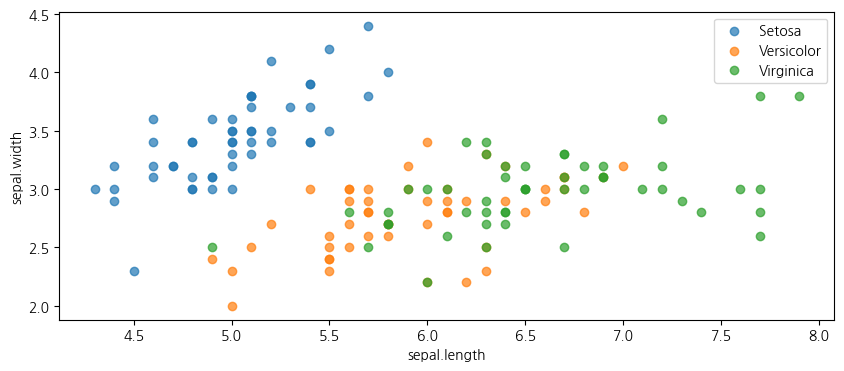

            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


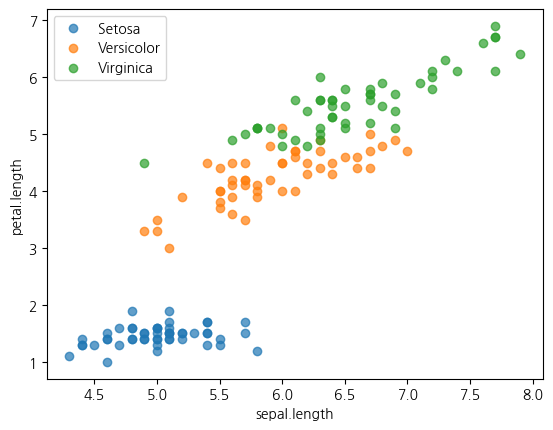

            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


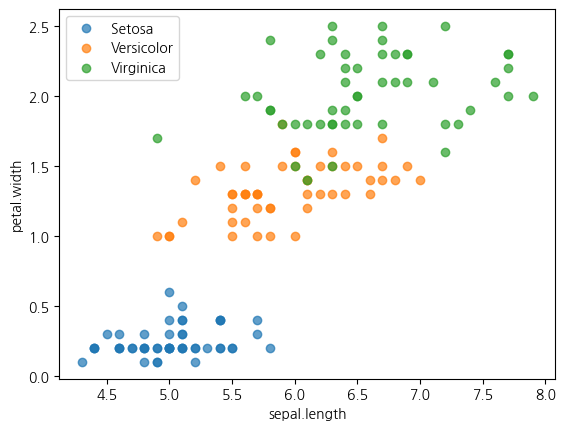

            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


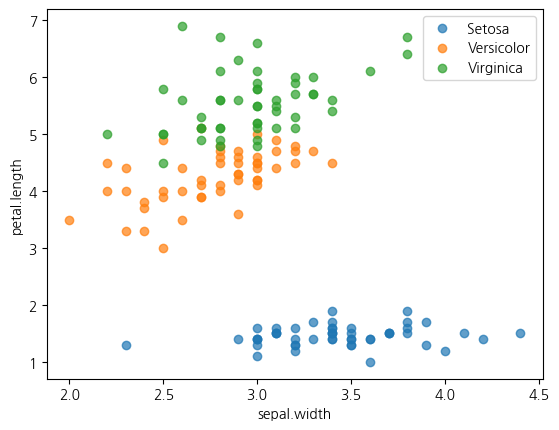

            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


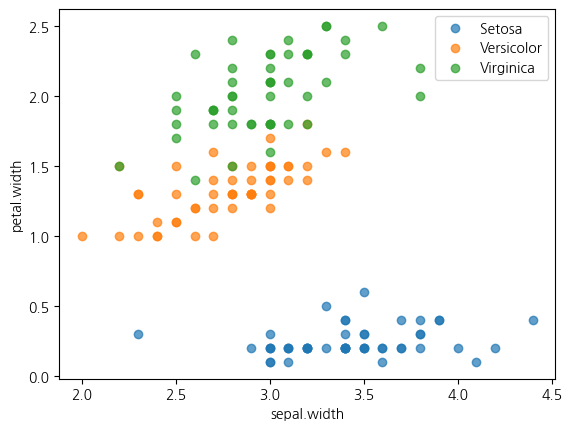

            sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             250.3        171.4          73.1         12.3
Versicolor         296.8        138.5         213.0         66.3
Virginica          329.4        148.7         277.6        101.3


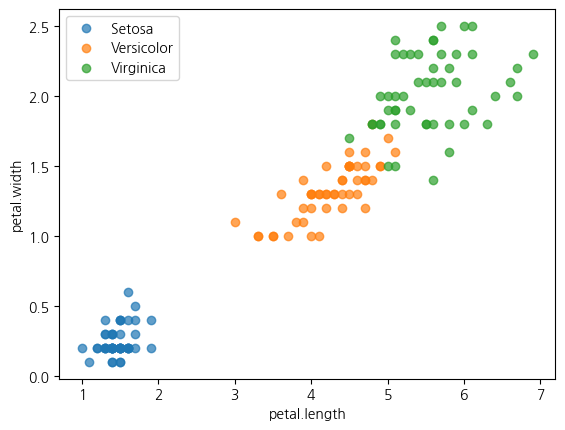

In [ ]:
## 방법2
## 시각화로 확인
plt.figure(figsize=(10,4))

for i in range(3):
    for j in range(i+1,4):
        x = allDF.columns[i]
        y = allDF.columns[j]
        print(allDF.groupby('variety').sum())
        ## 이름과 내용 반환해서 그리기
        for name, group in allDF.groupby('variety'): 
            plt.scatter(group[x], group[y], label=name, alpha=0.7)

        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        plt.show()

        
## -> petal.length 랑 petal.width 이 가장 구분하기 좋아보임

In [25]:
# 모델 생성
irisModel2 = KNeighborsClassifier()
irisModel2

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
display(allDF.columns)
featureDF = allDF[allDF.columns[2:4]]
targetSR = allDF[allDF.columns[-1]]

# 모델 학습
irisModel2.fit(featureDF, targetSR)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
# 모델 검증
irisModel2.score(featureDF, targetSR)

0.96

In [31]:
# 모델 테스트
irisModel2.predict([[1.5,.2]])

c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

In [35]:
## 입력 받아서 모델 예측하기
## 예시는 Setosa임
data = input('petal.length / petal.width 값을 입력하세요 (ex] 1.5 2) :').strip().split()
data = [ float(i) for i in data ]
irisModel2.predict([data])

c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)